In [29]:
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import DBSCAN

In [92]:
########## Récupération des valeurs dans les fichiers ##########

datafile = "outlier.json"
f = open(datafile, "r")
data_train = [json.loads(line) for line in f.readlines()]

datafile = "2abnormal1000.json"
f = open(datafile, "r")
data_test = [json.loads(line) for line in f.readlines()]

f.close()

In [93]:
########## Préprocessing des données  ##########

# Lecture des données pour l'apprentissage et création d'une liste pour chaque capteur
list_light, list_sound, list_temp_object, list_temp_ambient = [], [], [], []
for d in data_train:
    list_light.append(d["light"])
    list_sound.append(d["sound"])
    list_temp_object.append(d["temp"]["object"])
    list_temp_ambient.append(d["temp"]["ambient"])

nb_time_stamps = len(data_train)

# Conversion des listes en tableaux numpy
light_train = np.array(list_light)
sound_train = np.array(list_sound)
temp_object_train = np.array(list_temp_object)
temp_ambient_train = np.array(list_temp_ambient)

# Création d'un tableau avec toutes les valeurs
train_values = np.stack((light_train,sound_train,temp_object_train,temp_ambient_train), axis=-1)
tv = np.stack((light_train,sound_train,temp_object_train,temp_ambient_train))
#print(train_values)

In [94]:
########## Préprocessing des données  ##########

# Lecture des données pour le test et création d'une liste pour chaque capteur
list_light, list_sound, list_temp_object, list_temp_ambient = [], [], [], []
for d in data_test:
    list_light.append(d["light"])
    list_sound.append(d["sound"])
    list_temp_object.append(d["temp"]["object"])
    list_temp_ambient.append(d["temp"]["ambient"])

# Conversion des listes en tableaux numpy
light_test = np.array(list_light)
sound_test = np.array(list_sound)
temp_object_test = np.array(list_temp_object)
temp_ambient_test = np.array(list_temp_ambient)

# Création d'un tableau avec toutes les valeurs
test_values = np.stack((light_test,sound_test,temp_object_test,temp_ambient_test), axis=-1)
av = np.stack((light_test,sound_test,temp_object_test,temp_ambient_test))
#print(test_values)

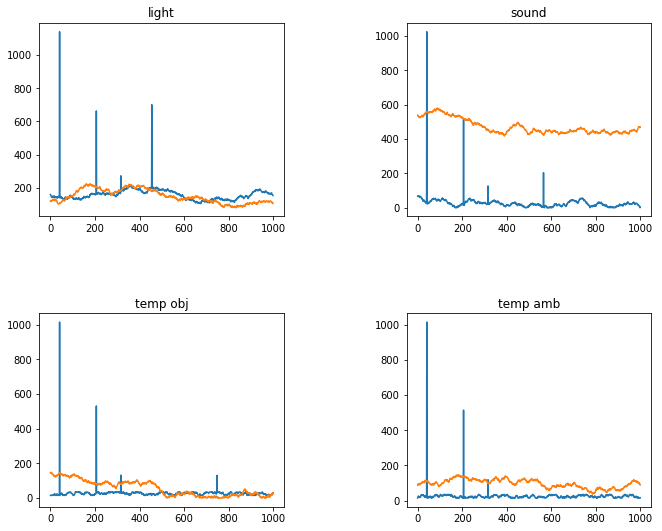

In [95]:
########## Affichage des données  ##########

# plot training values
plt.figure(1,figsize=(10, 8))

plt.subplot(221)
plt.plot(light_train,label="normal")
plt.plot(light_test,label="abnormal")
plt.title("light")

plt.subplot(222)
plt.plot(sound_train,label="normal")
plt.plot(sound_test,label="abnormal")
plt.title("sound")

plt.subplot(223)
plt.plot(temp_object_train,label="normal")
plt.plot(temp_object_test,label="abnormal")
plt.title("temp obj")

plt.subplot(224)
plt.plot(temp_ambient_train,label="normal")
plt.plot(temp_ambient_test,label="abnormal")
plt.title("temp amb")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.5)
plt.show()

In [96]:
########## Normalisation des données normales ##########

scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(train_values)
scaled_tv = scaler.fit_transform(tv)
print(scaled.shape)

idx = np.arange(scaled.shape[0])

scaled_light_train = np.array([(i,x) for (i,x) in zip(idx,scaled_tv[0])])
scaled_sound_train = np.array([(i,x) for (i,x) in zip(idx,scaled_tv[1])])
scaled_temp_object_train = np.array([(i,x) for (i,x) in zip(idx,scaled_tv[2])])
scaled_temp_ambient_train = np.array([(i,x) for (i,x) in zip(idx,scaled_tv[3])])
#print(scaled_light_train.shape)
Xl = np.array([(i,x) for (i,x) in zip(idx,light_train)])
Xs = np.array([(i,x) for (i,x) in zip(idx,sound_train)])
Xto = np.array([(i,x) for (i,x) in zip(idx,temp_object_train)])
Xta = np.array([(i,x) for (i,x) in zip(idx,temp_ambient_train)])
#print(Xta.shape)

(1000, 4)


In [149]:
eps = 10
nb_pts_min = 20
dbsc1 = DBSCAN(eps = eps, min_samples = nb_pts_min).fit(scaled_light_train)
dbsc2 = DBSCAN(eps = 9, min_samples = 18).fit(scaled_sound_train)
dbsc3 = DBSCAN(eps = eps, min_samples = nb_pts_min).fit(scaled_temp_object_train)
dbsc4 = DBSCAN(eps = eps, min_samples = nb_pts_min).fit(scaled_temp_ambient_train)
#X = scaled
#dbsc = DBSCAN(eps = 0.5, min_samples = 10).fit(X)
#core_samples_mask = np.zeros_like(dbsc.labels_, dtype=bool)
#core_samples_mask[dbsc.core_sample_indices_] = True
#labels = dbsc.labels_

number of clusters for light: 0
number of outliers for light: 0
number of clusters for sound: 8
number of outliers for sound: 338
number of clusters for temp obj: 9
number of outliers for temp obj: 640
number of clusters for temp amb: 9
number of outliers for temp amb: 640


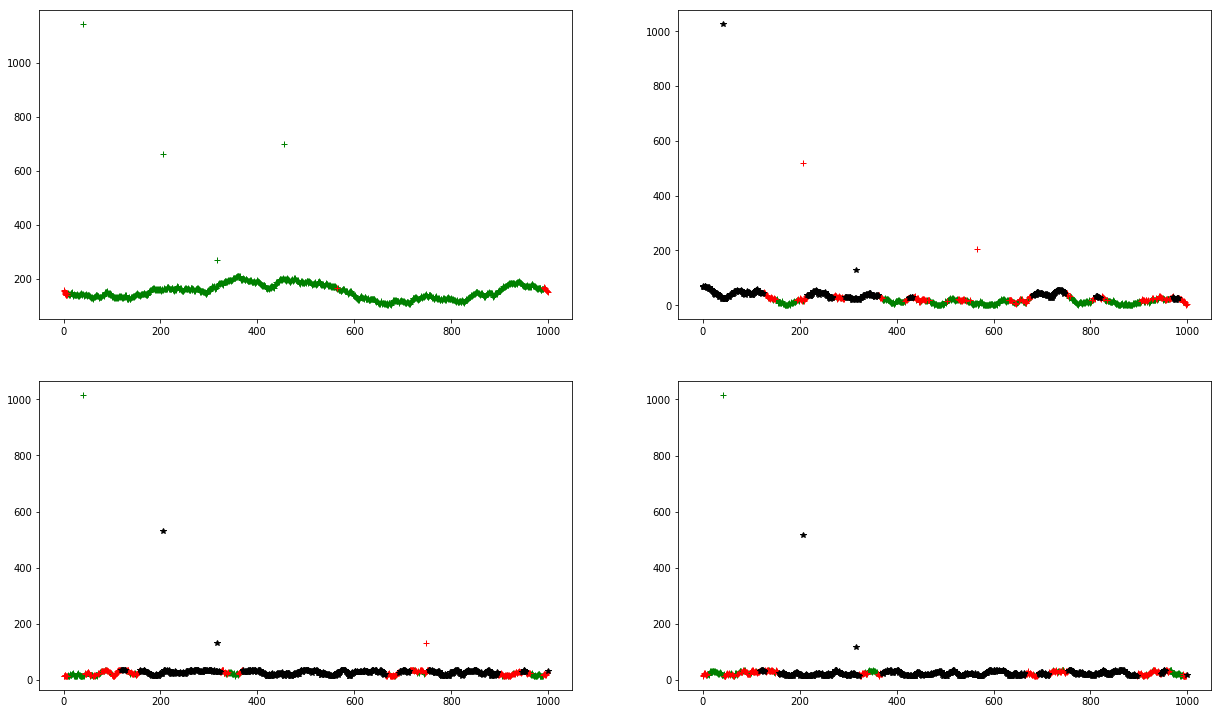

In [151]:
l_core_samples_mask = np.zeros_like(dbsc1.labels_, dtype=bool)
l_core_samples_mask[dbsc1.core_sample_indices_] = True
l_labels = dbsc1.labels_

s_core_samples_mask = np.zeros_like(dbsc2.labels_, dtype=bool)
s_core_samples_mask[dbsc2.core_sample_indices_] = True
s_labels = dbsc2.labels_

to_core_samples_mask = np.zeros_like(dbsc3.labels_, dtype=bool)
to_core_samples_mask[dbsc3.core_sample_indices_] = True
to_labels = dbsc3.labels_

ta_core_samples_mask = np.zeros_like(dbsc3.labels_, dtype=bool)
ta_core_samples_mask[dbsc3.core_sample_indices_] = True
ta_labels = dbsc3.labels_

# Number of clusters in labels, ignoring noise if present.
l_n_clusters_ = len(set(l_labels)) - (1 if -1 in labels else 0)
l_n_noise_ = list(l_labels).count(-1)
print("number of clusters for light:", l_n_clusters_)
print("number of outliers for light:", l_n_noise_)
s_n_clusters_ = len(set(s_labels)) - (1 if -1 in labels else 0)
s_n_noise_ = list(s_labels).count(-1)
print("number of clusters for sound:", s_n_clusters_)
print("number of outliers for sound:", s_n_noise_)
to_n_clusters_ = len(set(to_labels)) - (1 if -1 in labels else 0)
to_n_noise_ = list(to_labels).count(-1)
print("number of clusters for temp obj:", to_n_clusters_)
print("number of outliers for temp obj:", to_n_noise_)
ta_n_clusters_ = len(set(ta_labels)) - (1 if -1 in labels else 0)
ta_n_noise_ = list(ta_labels).count(-1)
print("number of clusters for temp amb:", ta_n_clusters_)
print("number of outliers for temp amb:", ta_n_noise_)

plt.figure(figsize=(9 * 2 + 3, 12.5))

#for (X,labels,core_samples_mask,z) in [(scaled_light_train,l_labels,l_core_samples_mask,1),
#                                       (scaled_sound_train,s_labels,s_core_samples_mask,2),
#                                       (scaled_temp_object_train,to_labels,to_core_samples_mask,3),
#                                       (scaled_temp_ambient_train,ta_labels,ta_core_samples_mask,4)]:
for (X,labels,core_samples_mask,z) in [(Xl,l_labels,l_core_samples_mask,1),
                                       (Xs,s_labels,s_core_samples_mask,2),
                                       (Xto,to_labels,to_core_samples_mask,3),
                                       (Xta,ta_labels,ta_core_samples_mask,4)]:
    place = 220 + z
    plt.subplot(place)
    # Black removed and is used for noise instead.
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)

        if k == -1:
            # Black used for noise.
            #col = [0, 0, 0, 1]
            mark = '*'
            #xy = X[class_member_mask & core_samples_mask]
            #plt.scatter(xy[:, 0], xy[:, 1], c='k',marker=mark)
            #plt.plot(xy[:, 0], xy[:, 1], 'm-')

            xy = X[class_member_mask & ~core_samples_mask]
            #plt.scatter(xy[:, 0], xy[:, 1], c='k',marker=mark)
            plt.plot(xy[:, 0], xy[:, 1], 'k*')
        else:
            mark = '+'
            xy = X[class_member_mask & core_samples_mask]
            #plt.scatter(xy[:, 0], xy[:, 1], cmap=tuple(col),marker=mark)
            plt.plot(xy[:, 0], xy[:, 1], 'g+')

            xy = X[class_member_mask & ~core_samples_mask]
            #plt.scatter(xy[:, 0], xy[:, 1], cmap=tuple(col),marker=mark)
            plt.plot(xy[:, 0], xy[:, 1], 'r+')

    #plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()